In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection, feature_selection, pipeline, ensemble, tree, datasets
from ipywidgets import interact
import scipy.stats as scs
import seaborn as sns
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
from sklearn import (pipeline,preprocessing,compose,linear_model,model_selection,neighbors,ensemble,tree,neural_network,model_selection)
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1. Isinma

## a. Coklu lineer regresyon

ML calismalari sirasinda konseptleri daha iyi anlamak icin sentetik veri setleri siklikla kullanilmaktadir. 

Asagida bu tip sentetik bir veri olusturma ornegi gormektesiniz:

In [10]:
# Ilk dataseti olusturma
X, y = datasets.make_regression(
    n_samples=300, 
    n_features=5, 
    n_informative=2, 
    noise=2.21, 
    random_state=42, 
    bias=4.0, 
    effective_rank=4,
    )

# Rassal olcekleme
dataset = pd.DataFrame(X).add_prefix('x_').assign(y=y) \
    .mul([100,-28, 1e-3, 1e4 , -2e6, 1]) \
    .add([20, 3, 1e-2, 190, 45e4, 0])

In [11]:
dataset.describe()

,x_0,x_1,x_2,x_3,x_4,y
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.224897,3.109065,0.009999,223.152915,454744.539689,3.639128
std,5.232330,1.246280,0.000052,514.175586,90036.934217,3.772030
min,5.160168,-0.572399,0.009846,-1346.547038,208961.200106,-11.035865
25%,16.816581,2.245774,0.009964,-110.383998,390729.524330,1.319760
50%,20.375005,3.171669,0.009998,262.261118,451122.205814,3.380763
75%,23.957288,3.915741,0.010034,568.491154,508219.877510,6.161928
max,34.575237,6.754764,0.010123,1742.530244,755062.504051,17.405587


Sentetik veri olusturma detaylarina asagidan ulasabilirsiniz:

[sklearn `make_regression` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression)

In [12]:
dataset.head()

,x_0,x_1,x_2,x_3,x_4,y
0,23.759943,2.210352,0.009984,539.089271,414372.427923,8.339542
1,27.698499,3.595618,0.010019,12.016667,406526.554494,7.807190
2,24.985284,1.303974,0.010069,676.779297,479943.326623,6.536755
3,10.884757,2.776216,0.009971,-131.935680,318766.889976,15.370564
4,25.520207,2.612674,0.009999,703.003344,549051.899774,1.286639


### I.

Veri setini egitim ve test setleri olmak uzere ikiye ayiriniz.

Referanslar:
- [sklearn `train_test_split` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split)

In [13]:
from sklearn import model_selection

model_selection.train_test_split # bolme islemi icin bu fonksiyonu kullanabilirsiniz.


<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,
                                                    test_size=0.20, 
                                                    random_state=42)

### II.

`x_i` degiskenlerinin bir fonksiyonu olarak `y`'yi modelleyen lineer regresyon modelini egitiniz.

Regresyon modeli icin scikit-learn `LinearRegression` sinifini kullaniniz.

- [sklearn `LinearRegression` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)
    - Tum parametre aciklamalari ve kullanim ornekleri yukaridaki baglantida mevcuttur.

In [15]:
from sklearn import linear_model

linear_model.LinearRegression # Linear Regresyon Modeli sinifi

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### III.

Modelinizin egitim ve test seti uzerindeki asagidaki metriklerini rapor ediniz:

- MSE [sklearn `mean_squared_error` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error)
- MAE [sklearn `mean_absolute_error` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean_absolute_error#sklearn.metrics.mean_absolute_error)
- $R^2$ [sklearn `r2_score` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn.metrics.r2_score)

- Diger tum metrikler icin genel referans ve tam liste [sklearn `metrics` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.html?highlight=metrics#sklearn.metrics)

In [16]:
from sklearn import metrics  # istediginiz metrikler bu modulde olabilir
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

metrics.mean_squared_error
metrics.mean_absolute_error
metrics.r2_score;
y_pred= model.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))


5.16889801229056
1.7835851464135397
0.4631720207169501


### IV.

Her bir degisken icin bulmus oldugunuz katsayi degerlerini ve intersepti rapor ediniz.

- Katsayi ve intersept degerlerinin hangi attribute'larda tutuldugunu bulmak icin [sklearn `LinearRegression` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)'ndan yararlanabilirsiniz.

In [17]:
print(model.coef_)
print(model.intercept_)


[-2.79234531 61.35053809 -1.72183325  0.73729297 61.70184638]
4.0640965937768385


### V.

Degiskenlerin katsayilari, degiskenlerin onemi ile ilgili bilgi vermekte midir? Tartisiniz.

### VI.

- Egitim setinizi olcekleyip lineer regresyon modelinizi tekrar egitiniz. Asagidaki olcekleme yontemlerinden herhangi birini kullanabilir ya da kendi tercih ettiginiz baska bir olcekleme uygulayabilirsiniz.
    - Standart scaler [sklearn `StandardScaler` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler)
    - Minmax scaler [sklearn `MinMaxScaler` referans sayfasi](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler)
- Elde edilen katsayilar, degiskenlerin onemine dair bilgi vermekte midir?

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
preprocessing.StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
scaler = preprocessing.StandardScaler()
Xs_std=scaler.fit_transform(X)
Xs_train,Xs_test,ys_train,ys_test =  train_test_split(Xs_std, y, test_size=0.2, random_state=42)

In [20]:
from sklearn import preprocessing

### VII.

Yeni egitmis oldugunuz model ile asagidaki verilerin `y` degerlerini tahmin ediniz.

|    |     x_0 |      x_1 |        x_2 |       x_3 |    x_4 |
|---:|--------:|---------:|-----------:|----------:|-------:|
|  0 | 16.7802 | 2.74543  | 0.00999759 | -201.841  | 384903 |
|  1 | 21.5037 | 4.99533  | 0.0100229  |  -73.2601 | 549222 |
|  2 | 16.8287 | 0.968607 | 0.00997303 | -120.439  | 470843 |

## b. Statsmodels ile coklu lineer regresyon

`scikit-learn`'e ek olarak, `statsmodels` kutuphanesi de pek cok istatistiksel analizi yapabilmektedir. Bu kisimda `statsmodels` ile lineer regresyon uygulamasi yapacagiz.

In [22]:
import statsmodels.api as sm

### I. 

`sm.OLS` ([statsmodels `OLS` referans sayfasi](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html?highlight=ols#statsmodels.regression.linear_model.OLS)) sinifi kullanarak `dataset` verisi uzerinde lineer regresyon modelini egitiniz.

In [24]:
X = dataset.drop('y', axis=1)
y = dataset['y']


sm.OLS # Ordinary Least Squares (OLS) Regresyon Modeli
# referanstan yararlanarak classi uygun sekilde kullaniniz

statsmodels.regression.linear_model.OLS

### II.

Egitmis oldugunuz lineer regresyon modelinin ozetini yazdiriniz.

### III.

Model ozetine gore, hangi degiskenlerin katsayilari istatistiksel olarak 0'dan farkli degildir? (katsayinin 0 olmasi, degiskenin etkisiz olduguna isaret edecektir.)

Soruyu cevaplarken ozet tablosundaki hangi verilerden yararlandiginizi aciklayiniz.

### IV.

`sm.formula.ols` fonksiyonunu kullanarak, `dataset` verisi uzerinde lineer regresyon modelini egitiniz.

[statsmodels `formula` referans sayfasi](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html?highlight=ols#statsmodels.formula.api.ols)

- Yukarida tespit etmis oldugunuz etkisiz degiskenlerden ikisini modelden cikariniz.
- Ozet tablosuna gore, modelinizin performansini rapor ediniz.

In [112]:
# Ornek model

result = sm.formula.ols('y ~ x_1 + x_4 - 1', data=dataset).fit()  # degiskenler rastgele secilmistir
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              92.51
Date:                Sun, 17 Jul 2022   Prob (F-statistic):                    5.58e-32
Time:                        03:56:10   Log-Likelihood:                         -849.95
No. Observations:                 300   AIC:                                      1704.
Df Residuals:                     298   BIC:                                      1711.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_1           -0.2280      0.155     -1.470      0.143      -0.533       0.077
x_4         8.415e-06   1.12e-06      7.509      0.000    6.21e-06    1.06e-05
==============================================================================
Omnibus:                        8.957   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               15.187
Skew:                          -0.114   Prob(JB):                     0.000504
Kurtosis:                       4.078   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### V.

Ozet tablosundaki asagidaki terimlerin anlamlariyla ilgili kisa bilgi veriniz:

- `F-statistic`
- `Log-likelihood`
- `AIC`
- `BIC`
- `Jarque-Bera`
- `Durbin-Watson`
- `Cond. No.`


## c. Lineer regresyon varsayimlari

### I.

Lineer regresyonun kullanilabilmesi (ya da sonuclarin anlamli bir sekilde yorumlanabilmesi) icin, datasetin hangi **varsayimlara** uymasi gerekmektedir?

### II.

`b.V`'de aciklamis oldugunuz terimleri, kontrol ettikleri varsayimlar ile eslestiriniz

### III.

`b.V`'de aciklamis oldugunuz terimlerden hangileri, iki farkli degiskenlerle olusturulmus iki lineer regresyon modelini karsilastirmak icin kullanilabilir?

# 2. Non-lineer problemlerin donusumler ile lineerlestirilmesi

Verilen datasette bir urune ait farkli magazalardaki % indirim oranlari ve satis rakamlari sunulmustur.

- `indirim`: % cinsinden indirim oranlari. Ornegin, etiket fiyati 100 TL olan bir mal 90 TL'ye satiliyorsa indirim %10 olarak gozukecektir.
- `satis`: Adet cinsinden satis rakamlari.
- `urun_no`: Urun numaralari.
- `magaza`: Magaza kodu.

In [57]:
satislar = pd.read_csv("Satislar.csv")
satislar.head()

,indirim,satis,urun_no,magaza
0,48.562845,120,1,B
1,24.546790,81,1,C
2,51.834145,116,1,C
3,35.645141,105,1,C
4,27.957976,71,1,C


## a. Kesif


### I. 
Indirime karsilik satis rakamlarini gorsellestiriniz. Her bir magazaya ait veriyi farkli renkle gosteriniz.

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='indirim', ylabel='satis'>

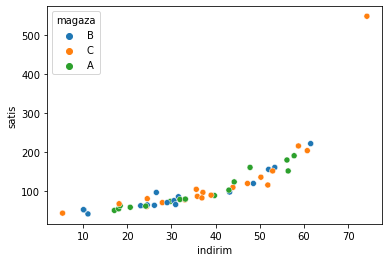

In [58]:
import seaborn as sns
sns.scatterplot(satislar.indirim,satislar.satis,
                hue=satislar.magaza)

### II.

Indirim ve satis degiskenlerinin dagilimini gorsellestiriniz.

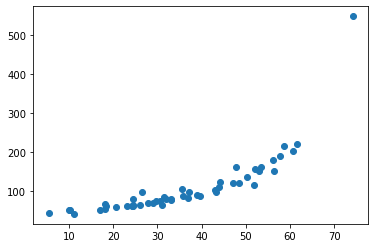

In [59]:
plt.scatter(satislar.indirim,satislar.satis)

## b. Dumduk modelleme

### I.

Indirimin bir fonksiyonu olarak satisi modelleyecek lineer regresyon modelini egitiniz.

$$satis = (b_1)(indirim) + (b_0)$$

In [83]:
y = satislar["satis"]
X = satislar["indirim"]
X=np.array(X)
y=np.array(y)


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [88]:
lr=LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

### II.

Egitmis oldugunuz modelin egitim seti uzerindeki hatalarinin dagilimini gorsellestiriniz.

Hata $\epsilon$, her bir ornek icin isaretli bir sekilde asagidaki gibi hesaplanmaktadir:

$$\epsilon_i = \hat{y}_i - y_i$$

### III.

Tahmin edilen degerler $\hat{y}$'ye karsilik hatalar $\epsilon$'yi gorsellestiriniz.

Hatalarda bir patern goruyor musunuz? (Lineer regresyon hatalarinda patern gozukmesini bekler miydiniz?)

## c. Donusum



**Son talep $D$**; fiyat elastikiyeti $e$, baz talep $D_0$ ve indirim $d$ cinsinden asagidaki gibi ifade edilebilir:

$$D = D_0 (d)^{-e}$$

- Indirim $d$ su sekilde hesaplanmaktadir: $\frac{P}{P_0}$
- $P$ mevcut satis fiyati
- $P_0$ etiket fiyati

---

> Baz talep $D_0$ ve elastikiyet $e$ degerlerinin her urun icin sabit oldugu ve indirime gore degismedigi kabul edilmektedir.

> Elimizdeki envanter miktarinin sinirsiz oldugu kabul edilmektedir. 
> 
> $$D = satis$$


### I.

Yukarida verilen sartlar altinda, satisi indirimin bir fonksiyonu olarak lineer regresyon ile modellemek mumkun mudur? Aciklayiniz.

### II.

Veriyi lineer regresyon ile modellemek icin gerekli donusumleri yapiniz.

### III.

Veriyi egitim ve test seti olarak ikiye ayiriniz.

### IV.

- Lineer regresyon modelini egitiniz. 
- Egitim ve test setleri uzerinde performansi rapor ediniz.

### V.

Performans raporunuzda hangi metrikleri kullandiniz? Kullanilan metriklerin anlamini aciklayiniz.

(Performansi donusturdugunuz degerler uzerinde degil, orjinal degerler uzerinde rapor etmeye dikkat ediniz.)

### VI.

Urun icin bulmus oldugunuz baz talep $D_0$ ve elastikiyet $e$ degerlerini rapor ediniz.

### VII.

Modelinizi daha sonra kullanilmak uzere `joblib` kutuphanesi ile kaydediniz.

In [ ]:
import joblib



## d. Magaza

Magazalarin satis uzerinde etkisi oldugundan suphelenilmektedir.

### I.

`c` sikkinda egitmis oldugunuz lineer regresyon modelini, magaza etkisini de dahil edecek sekilde genisletmek mumkun mudur?

- `{A, B, C}` gibi sayisal olmayan degiskenler lineer regresyon modeline nasil dahil edilebilir? Aciklayiniz

### II.

Magazalarin medyan satis rakamlari arasinda istatistiksel olarak anlamli bir farklilik var midir? Uygun testi kullanarak sonuclari yorumlayiniz.

### III.

`c` sikkinda egitmis oldugunuz modeli, magaza kodlarini da dahil ederek tekrar egitiniz.

Elde etmis oldugunuz katsayilara gore magazanin satis uzerindeki etkisini yorumlayiniz.

- one hot encoder [onehotencoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- sm.ols [OLS](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html)